<h1> # AI-ML Research: Student Profiling System </h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<b> """
    ML Concept: Unsupervised Learning - Clustering </b> <br>
    <b> Algorithm: K-Means Clustering + TF-IDF Vectorization </b> <br>
    <b> Purpose: Group students with similar academic profiles and skills </b> <br>
    """ </b>
<hr>
<b> """
        ML Algorithm: K-Means Clustering </b> <br>
       <b> Concept: Unsupervised learning to group similar students </b> <br>
       <b> Features: Academic scores, skills, performance metrics
        """ </b> <br>

In [7]:

class StudentProfilingAI:
    
    
    def __init__(self):
        self.student_data = None
        self.kmeans_model = None
        self.scaler = StandardScaler()
        self.tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
        
    def load_and_preprocess_data(self):
        """Load multiple datasets for comprehensive profiling"""
        # Load student performance data
        perf_df = pd.read_csv('C:/Users/ommji_mttma5p/OneDrive/Desktop/BPUT/career_platform/datasets/StudentsPerformance.csv')
        
        # Load student information dataset  
        info_df = pd.read_csv("C:/Users/ommji_mttma5p/OneDrive/Desktop/BPUT/career_platform/datasets/students.csv")
        
        # Load educational data
        edu_df = pd.read_csv("C:/Users/ommji_mttma5p/OneDrive/Desktop/BPUT/career_platform/datasets/xAPI-Edu-Data.csv")
        
        print("📊 ML Step 1: Data Integration from Multiple Sources")
        print(f"   - Student Performance: {len(perf_df)} records")
        print(f"   - Student Information: {len(info_df)} records") 
        print(f"   - Educational Data: {len(edu_df)} records")
        
        # Feature Engineering
        perf_df['academic_score'] = (perf_df['math score'] + perf_df['reading score'] + perf_df['writing score']) / 3
        perf_df['cgpa'] = perf_df['academic_score'] / 10
        
        # Generate skills based on performance
        def generate_skills(row):
            skills = []
            if row['math score'] > 80:
                skills.extend(['Mathematics', 'Analytical Thinking', 'Problem Solving'])
            if row['writing score'] > 80:
                skills.extend(['Communication', 'Content Writing', 'Documentation'])
            if row['reading score'] > 80:
                skills.extend(['Comprehension', 'Research', 'Analysis'])
                
            # Technical skills based on overall performance
            if row['academic_score'] > 85:
                skills.extend(['Python', 'Java', 'Data Structures', 'Algorithms', 'Machine Learning'])
            elif row['academic_score'] > 75:
                skills.extend(['Python', 'Web Development', 'SQL', 'JavaScript'])
            else:
                skills.extend(['Basic Programming', 'Office Tools', 'Communication'])
                
            return ', '.join(list(set(skills)))
        
        perf_df['skills'] = perf_df.apply(generate_skills, axis=1)
        self.student_data = perf_df
        return self.student_data
    
    def create_student_clusters(self, n_clusters=4):
        
        print("\n🎯 ML Step 2: Student Clustering using K-Means")
        
        # Prepare features for clustering
        features = []
        for idx, student in self.student_data.iterrows():
            feature_vector = [
                student['cgpa'],
                len(student['skills'].split(',')),
                1 if 'Python' in student['skills'] else 0,
                1 if 'Java' in student['skills'] else 0,
                1 if 'Communication' in student['skills'] else 0,
                student['math score'] / 100,
                student['writing score'] / 100
            ]
            features.append(feature_vector)
        
        # Scale features
        features_scaled = self.scaler.fit_transform(features)
        
        # Apply K-Means clustering
        self.kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        clusters = self.kmeans_model.fit_predict(features_scaled)
        
        self.student_data['cluster'] = clusters
        self.student_data['cluster_name'] = self.student_data['cluster'].map({
            0: 'High-Tech Profile',
            1: 'Analytical Thinker', 
            2: 'Communication Focused',
            3: 'Balanced All-Rounder'
        })
        
        print("✅ Clustering Completed!")
        print(f"   - Algorithm: K-Means Clustering")
        print(f"   - Number of Clusters: {n_clusters}")
        print(f"   - Features Used: CGPA, Skill Count, Technical Skills, Soft Skills")
        
        return clusters
    
    def visualize_clusters(self):
        """Visualize student clusters for explanation"""
        plt.figure(figsize=(12, 8))
        
        # Plot 1: Cluster distribution
        plt.subplot(2, 2, 1)
        cluster_counts = self.student_data['cluster_name'].value_counts()
        plt.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%')
        plt.title('Student Cluster Distribution')
        
        # Plot 2: CGPA vs Skills by cluster
        plt.subplot(2, 2, 2)
        scatter = plt.scatter(self.student_data['cgpa'], 
                            self.student_data['skills'].str.split(',').str.len(),
                            c=self.student_data['cluster'], cmap='viridis')
        plt.xlabel('CGPA')
        plt.ylabel('Number of Skills')
        plt.colorbar(scatter, label='Cluster')
        plt.title('CGPA vs Skills by Cluster')
        
        # Plot 3: Math vs Writing scores by cluster
        plt.subplot(2, 2, 3)
        scatter = plt.scatter(self.student_data['math score'], 
                            self.student_data['writing score'],
                            c=self.student_data['cluster'], cmap='viridis')
        plt.xlabel('Math Score')
        plt.ylabel('Writing Score')
        plt.colorbar(scatter, label='Cluster')
        plt.title('Academic Strengths by Cluster')
        
        plt.tight_layout()
        plt.show()
    
    def explain_ml_concepts(self):
        """Clearly explain ML concepts used"""
        concepts = {
            'algorithm': 'K-Means Clustering',
            'type': 'Unsupervised Learning',
            'purpose': 'Group students with similar academic and skill profiles',
            'input_features': ['CGPA', 'Skill Count', 'Technical Skills', 'Soft Skills', 'Math Score', 'Writing Score'],
            'output': 'Student clusters for personalized recommendations',
            'advantages': [
                'Discovers hidden patterns in student data',
                'No need for labeled data',
                'Scalable to large datasets'
            ],
            'business_application': 'Personalized career paths based on cluster characteristics'
        }
        
        print("\n🧠 ML Concept Explanation: Student Profiling")
        for key, value in concepts.items():
            print(f"   {key.replace('_', ' ').title()}: {value}")



📊 ML Step 1: Data Integration from Multiple Sources
   - Student Performance: 1000 records
   - Student Information: 200 records
   - Educational Data: 480 records

🎯 ML Step 2: Student Clustering using K-Means
✅ Clustering Completed!
   - Algorithm: K-Means Clustering
   - Number of Clusters: 4
   - Features Used: CGPA, Skill Count, Technical Skills, Soft Skills


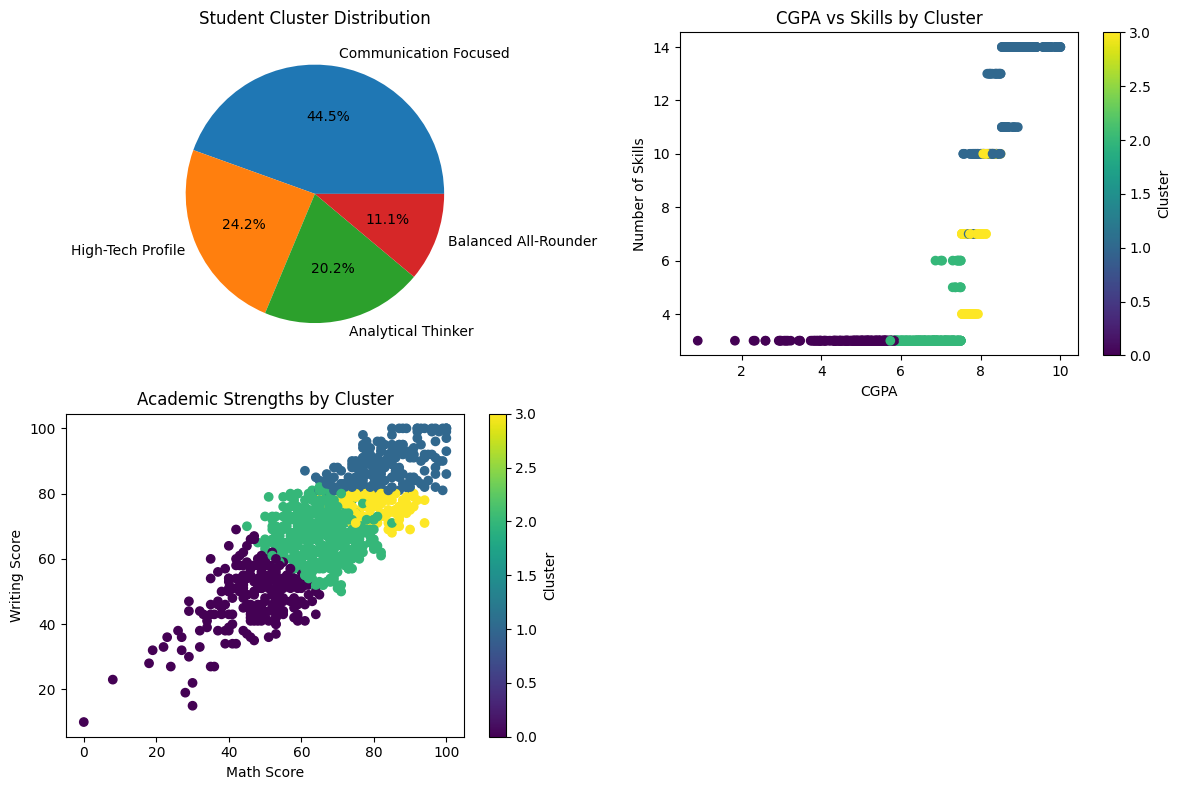


🧠 ML Concept Explanation: Student Profiling
   Algorithm: K-Means Clustering
   Type: Unsupervised Learning
   Purpose: Group students with similar academic and skill profiles
   Input Features: ['CGPA', 'Skill Count', 'Technical Skills', 'Soft Skills', 'Math Score', 'Writing Score']
   Output: Student clusters for personalized recommendations
   Advantages: ['Discovers hidden patterns in student data', 'No need for labeled data', 'Scalable to large datasets']
   Business Application: Personalized career paths based on cluster characteristics


In [8]:
# Execute the profiling
profiler = StudentProfilingAI()
student_data = profiler.load_and_preprocess_data()
clusters = profiler.create_student_clusters()
profiler.visualize_clusters()
profiler.explain_ml_concepts()